# üéØ Ejemplo de ajuste no lineal del Movimiento Arm√≥nico Simple (M.A.S.)

En esta notebook aprender√°s a:
- Cargar tus datos experimentales desde un archivo `.txt` exportado de Logger Pro
- Acotar el intervalo de an√°lisis a un tramo aproximadamente peri√≥dico
- Ajustar las ecuaciones del Movimiento Arm√≥nico Simple (M.A.S.)
- Visualizar y comparar tus datos con el modelo ajustado

---

In [1]:
# üì• Carga de datos desde archivo exportado
import numpy as np

# Ruta del archivo .txt exportado desde Logger Pro
ruta_archivo = "Datos-prueba/biela-manivela-30Hz-08-05-2025.txt"

# Cargar el archivo (ajustar skip_header si es necesario)
data = np.genfromtxt(ruta_archivo, skip_header=7)

# Verifica las primeras filas
print("Primeras filas del archivo completo:")
print(data[:5])

Primeras filas del archivo completo:
[[ 0.033333    0.3706115   0.44504695  0.2114018   0.17453293  4.82879255
   2.87985086]
 [ 0.066666    0.385189    0.45340766  0.07997538  0.33161256  4.945149
   2.41078424]
 [ 0.099999    0.4004525   0.46219712 -0.25221723  0.50614548  4.98296484
   2.47259923]
 [ 0.133332    0.4169165   0.44518987 -0.79445391  0.66322512  5.04696089
   4.05554755]
 [ 0.166665    0.430808    0.40574447 -1.25632217  0.83775804  5.25058467
   5.57789296]]


In [2]:
# üîç Acotado de datos por intervalo de tiempo
# Elegimos un intervalo donde la se√±al de aceleraci√≥n sea aproximadamente peri√≥dica

t_total = data[:, 0]  # columna de tiempo

# Define el rango de tiempo (ajustable por el alumno)
t_min = 0
t_max = 12

# Crear m√°scara y aplicar
mascara = (t_total >= t_min) & (t_total <= t_max)
datos = data[mascara]

# Separar columnas

#t, x, omega, alpha, theta, v, a = datos.T
#t, x, omega, alpha, theta, v, a = datos.T

t, x, v, a, theta, omega, alpha = datos.T

print(theta)

print(f"Datos acotados entre t = {t_min}s y {t_max}s. Total de muestras: {len(t)}")

[ 0.17453293  0.33161256  0.50614548  0.66322512  0.83775804  1.01229097
  1.20427718  1.3962634   1.58824962  1.76278254  1.90240888  2.05948852
  2.19911486  2.32128791  2.46091425  2.58308729  2.70526034  2.84488668
  2.98451302  3.10668607  3.24631241  3.38593875  3.52556509  3.64773814
  3.76991118  3.89208423  4.01425728  4.13643033  4.25860337  4.38077642
  4.52040276  4.6600291   4.79965544  4.92182849  5.06145483  5.18362788
  5.30580093  5.44542727  5.56760031  5.70722665  5.84685299  5.98647933
  6.14355897  6.28318531  6.44026494  6.59734457  6.75442421  6.91150384
  7.08603676  7.2431164   7.40019603  7.55727566  7.71435529  7.85398163
  7.99360797  8.15068761  8.29031395  8.42994029  8.58701992  8.72664626
  8.88372589  9.02335223  9.18043187  9.32005821  9.47713784  9.61676418
  9.75639052  9.89601686 10.0356432  10.15781625 10.29744259 10.41961563
 10.55924197 10.69886831 10.82104136 10.9606677  11.10029404 11.22246709
 11.34464014 11.46681319 11.57153294 11.69370599 11

In [3]:
# üßÆ Ajuste no lineal de x(t) usando modelo del M.A.S.
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def x_mas(t, A0, A, w, phi):
    return A0 + A * np.cos(w * t + phi)

# Estimar valores iniciales
A0_est = (np.max(x) + np.min(x)) / 2
A_est = (np.max(x) - np.min(x)) / 2
f = 5 / 8
w_est = 2 * np.pi * f   # Hz = 1 ciclo/seg

p0 = [A0_est, A_est, w_est, 1]
popt, _ = curve_fit(x_mas, t, x, p0=p0)

# Valores ajustados
A0_fit, A_fit, w_fit, phi_fit = popt
print(f"A0 = {A0_fit:.4f}, A = {A_fit:.4f}, œâ = {w_fit:.4f}, œÜ = {phi_fit:.4f}")

Matplotlib is building the font cache; this may take a moment.


A0 = 0.4010, A = 0.0845, œâ = 4.1593, œÜ = -1.8570


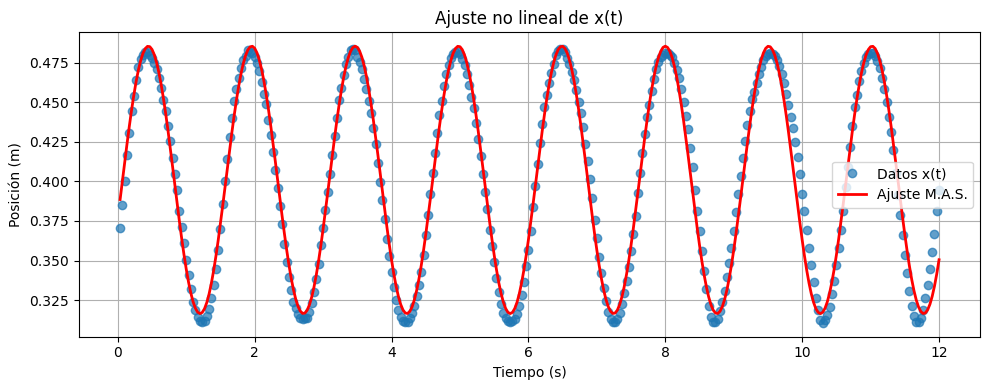

In [4]:
# üìà Gr√°fica de comparaci√≥n
x_ajustada = x_mas(t, *popt)

plt.figure(figsize=(10, 4))
plt.plot(t, x, label="Datos x(t)", marker='o', linestyle='', alpha=0.7)
plt.plot(t, x_ajustada, label="Ajuste M.A.S.", color='red', linewidth=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posici√≥n (m)")
plt.title("Ajuste no lineal de x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## üßÆ Ajuste de velocidad y aceleraci√≥n

Utilizamos las expresiones derivadas del M.A.S. para ajustar los datos de velocidad y aceleraci√≥n:

In [5]:
# --- Definiciones de funciones ---
def v_mas(t, A, w, phi):
    return -w * A * np.sin(w * t + phi)

def a_mas(t, A, w, phi):
    return -w**2 * A * np.cos(w * t + phi)

# --- Ajuste de velocidad ---
popt_v, _ = curve_fit(v_mas, t, v, p0=[A_fit, w_fit, phi_fit])
v_ajustada = v_mas(t, *popt_v)

# --- Ajuste de aceleraci√≥n ---
popt_a, _ = curve_fit(a_mas, t, a, p0=[A_fit, w_fit, phi_fit])
a_ajustada = a_mas(t, *popt_a)

# Mostrar par√°metros
print("Par√°metros del ajuste de velocidad: A = {:.4f}, œâ = {:.4f}, œÜ = {:.4f}".format(*popt_v))
print("Par√°metros del ajuste de aceleraci√≥n: A = {:.4f}, œâ = {:.4f}, œÜ = {:.4f}".format(*popt_a))

Par√°metros del ajuste de velocidad: A = 0.0858, œâ = 4.1638, œÜ = -1.8706
Par√°metros del ajuste de aceleraci√≥n: A = 0.0857, œâ = 4.1532, œÜ = -1.8074


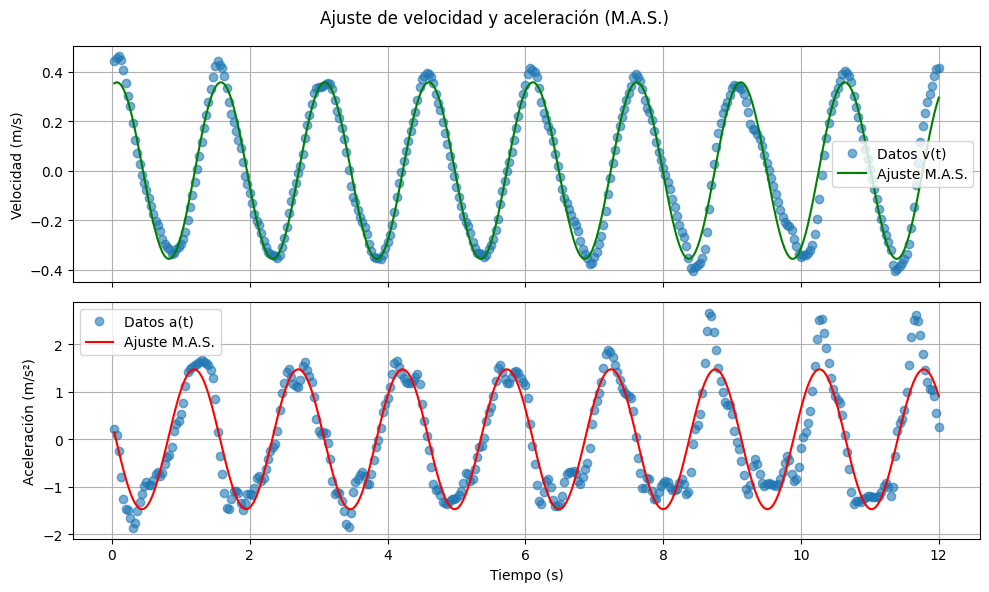

In [6]:
# --- Gr√°ficas comparativas ---
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Velocidad
axs[0].plot(t, v, label="Datos v(t)", marker='o', linestyle='', alpha=0.6)
axs[0].plot(t, v_ajustada, label="Ajuste M.A.S.", color='green')
axs[0].set_ylabel("Velocidad (m/s)")
axs[0].legend()
axs[0].grid(True)

# Aceleraci√≥n
axs[1].plot(t, a, label="Datos a(t)", marker='o', linestyle='', alpha=0.6)
axs[1].plot(t, a_ajustada, label="Ajuste M.A.S.", color='red')
axs[1].set_ylabel("Aceleraci√≥n (m/s¬≤)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].legend()
axs[1].grid(True)

plt.suptitle("Ajuste de velocidad y aceleraci√≥n (M.A.S.)")
plt.tight_layout()
plt.show()

[ 0.17453293  0.33161256  0.50614548  0.66322512  0.83775804  1.01229097
  1.20427718  1.3962634   1.58824962  1.76278254  1.90240888  2.05948852
  2.19911486  2.32128791  2.46091425  2.58308729  2.70526034  2.84488668
  2.98451302  3.10668607  3.24631241  3.38593875  3.52556509  3.64773814
  3.76991118  3.89208423  4.01425728  4.13643033  4.25860337  4.38077642
  4.52040276  4.6600291   4.79965544  4.92182849  5.06145483  5.18362788
  5.30580093  5.44542727  5.56760031  5.70722665  5.84685299  5.98647933
  6.14355897  6.28318531  6.44026494  6.59734457  6.75442421  6.91150384
  7.08603676  7.2431164   7.40019603  7.55727566  7.71435529  7.85398163
  7.99360797  8.15068761  8.29031395  8.42994029  8.58701992  8.72664626
  8.88372589  9.02335223  9.18043187  9.32005821  9.47713784  9.61676418
  9.75639052  9.89601686 10.0356432  10.15781625 10.29744259 10.41961563
 10.55924197 10.69886831 10.82104136 10.9606677  11.10029404 11.22246709
 11.34464014 11.46681319 11.57153294 11.69370599 11

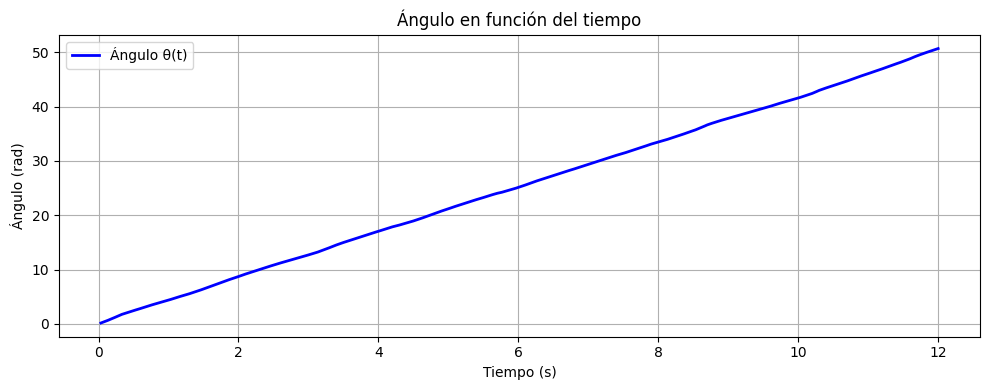

In [7]:
# üìà Gr√°fica del √°ngulo (theta) en funci√≥n del tiempo
print(theta)
plt.figure(figsize=(10, 4))
plt.plot(t, theta, label="√Ångulo Œ∏(t)", color='blue', linewidth=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("√Ångulo (rad)")
plt.title("√Ångulo en funci√≥n del tiempo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


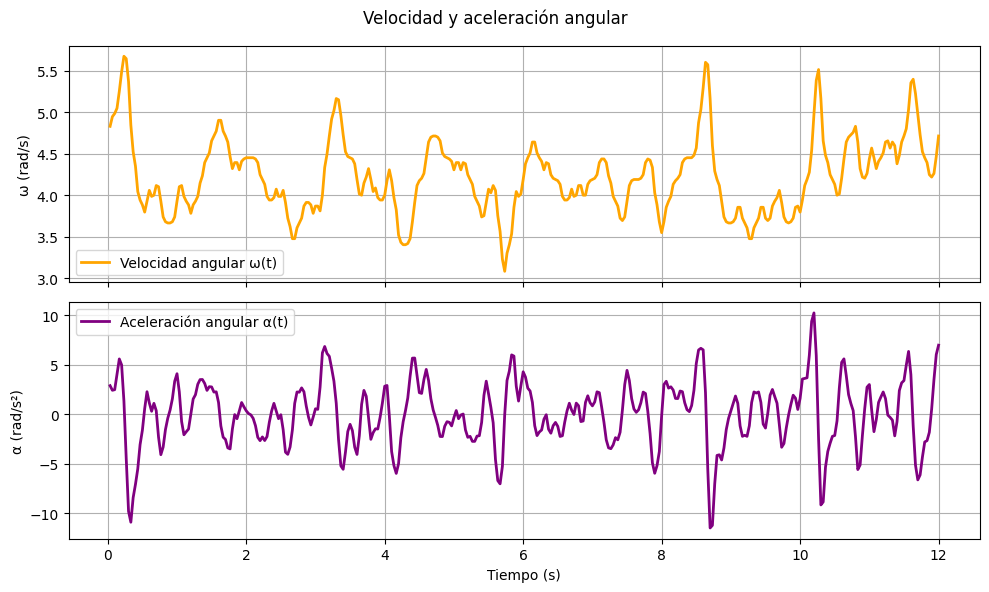

In [8]:
# üìà Gr√°fica de velocidad y aceleraci√≥n angular
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Velocidad angular (omega)
axs[0].plot(t, omega, label="Velocidad angular œâ(t)", color='orange', linewidth=2)
axs[0].set_ylabel("œâ (rad/s)")
axs[0].grid(True)
axs[0].legend()

# Aceleraci√≥n angular (alpha)
axs[1].plot(t, alpha, label="Aceleraci√≥n angular Œ±(t)", color='purple', linewidth=2)
axs[1].set_ylabel("Œ± (rad/s¬≤)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].grid(True)
axs[1].legend()

plt.suptitle("Velocidad y aceleraci√≥n angular")
plt.tight_layout()
plt.show()


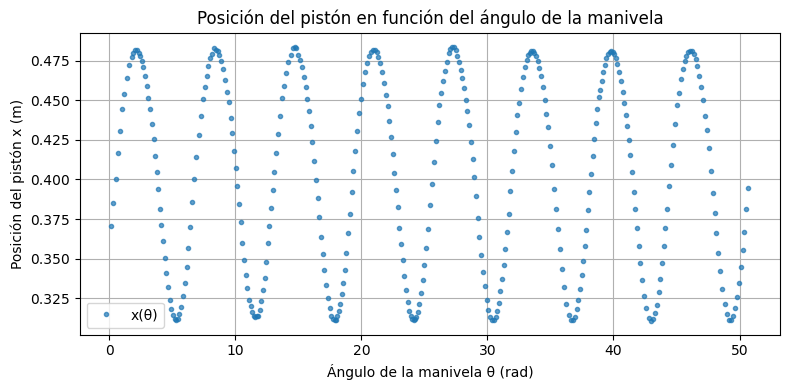

In [9]:
# üìà Gr√°fica de posici√≥n x en funci√≥n del √°ngulo theta
plt.figure(figsize=(8, 4))
plt.plot(theta, x, 'o', markersize=3, alpha=0.7, label="x(Œ∏)")
plt.xlabel("√Ångulo de la manivela Œ∏ (rad)")
plt.ylabel("Posici√≥n del pist√≥n x (m)")
plt.title("Posici√≥n del pist√≥n en funci√≥n del √°ngulo de la manivela")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Ajuste x(Œ∏): A0 = 0.4022, A = -0.0855, œÜ = 0.9956


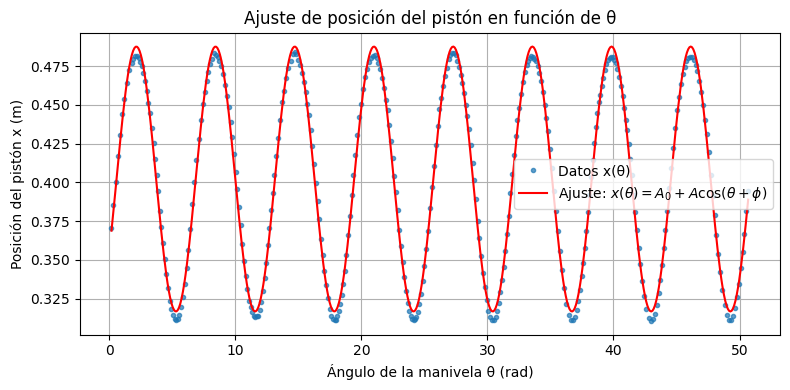

In [10]:
from scipy.optimize import curve_fit

# --- Definici√≥n del modelo ---
def x_theta_model(theta, A0, A, phi):
    return A0 + A * np.cos(theta + phi)

# --- Estimaciones iniciales ---
A0_est = np.mean(x)
A_est = (np.max(x) - np.min(x)) / 2
phi_est = 0.0
p0 = [A0_est, A_est, phi_est]

# --- Ajuste ---
params, _ = curve_fit(x_theta_model, theta, x, p0=p0)
A0_fit, A_fit, phi_fit = params
print(f"Ajuste x(Œ∏): A0 = {A0_fit:.4f}, A = {A_fit:.4f}, œÜ = {phi_fit:.4f}")

# --- Valores ajustados ---
theta_fit = np.linspace(np.min(theta), np.max(theta), 500)
x_fit = x_theta_model(theta_fit, *params)

# --- Gr√°fica ---
plt.figure(figsize=(8, 4))
plt.plot(theta, x, 'o', markersize=3, label="Datos x(Œ∏)", alpha=0.7)
plt.plot(theta_fit, x_fit, '-', color='red', label="Ajuste: $x(\\theta) = A_0 + A \\cos(\\theta + \\phi)$")
plt.xlabel("√Ångulo de la manivela Œ∏ (rad)")
plt.ylabel("Posici√≥n del pist√≥n x (m)")
plt.title("Ajuste de posici√≥n del pist√≥n en funci√≥n de Œ∏")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


0.033333
Harm√≥nico 1 ‚ûú  f1 = 0.667 Hz,  A1 = 1.4704,  œÜ1 = 1.261 rad
Harm√≥nico 2 ‚ûú  f2 = 1.333 Hz,  A2 = 0.3467,  œÜ2 = 2.080 rad


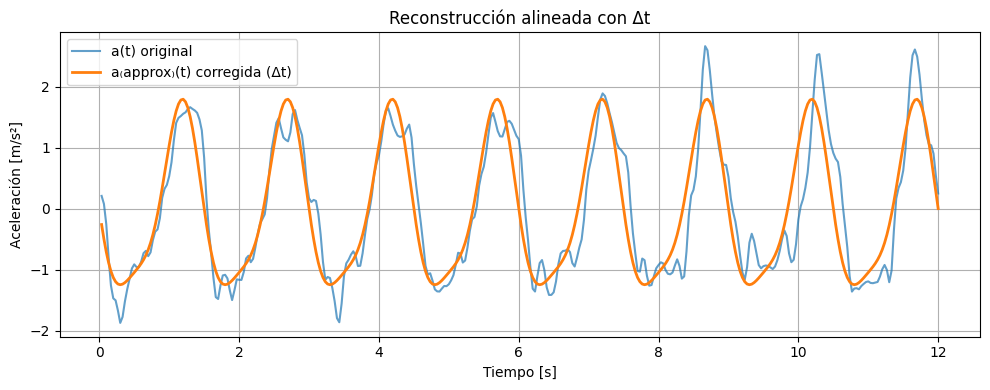

In [11]:
# -----------------------------------------------------------
# üîâ 1. Transformada Discreta de Fourier (DFT) de a(t)
# -----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# --- FFT ---
N  = len(a)                      # n√∫mero de muestras

print(t[1]-t[0])

dt = t[1] - t[0]                 # periodo de muestreo
fs = 1 / dt                      # frecuencia de muestreo
A_f = np.fft.rfft(a - np.mean(a))          # quitamos la componente DC
freqs = np.fft.rfftfreq(N, d=dt)           # vector de frecuencias

# M√≥dulo del espectro escalado para ‚Äúamplitud de coseno‚Äù
mag = 2 * np.abs(A_f) / N        # factor 2 para compensar la mitad negativa
mag[0] = 0                       # ignoramos la componente DC

# -----------------------------------------------------------
# üîç 2. Detecci√≥n de los dos arm√≥nicos dominantes
# -----------------------------------------------------------
# √çndices de los dos picos m√°s altos
idx_peaks = np.argsort(mag)[-2:]               # 2 mayores
idx_peaks = idx_peaks[np.argsort(freqs[idx_peaks])]  # ordenados por frecuencia

# Par√°metros extra√≠dos
f1, f2       = freqs[idx_peaks]                # Hz
A1, A2       = mag[idx_peaks]                  # amplitudes
phi1, phi2   = np.angle(A_f[idx_peaks])        # radianes

print(f"Harm√≥nico 1 ‚ûú  f1 = {f1:.3f} Hz,  A1 = {A1:.4f},  œÜ1 = {phi1:.3f} rad")
print(f"Harm√≥nico 2 ‚ûú  f2 = {f2:.3f} Hz,  A2 = {A2:.4f},  œÜ2 = {phi2:.3f} rad")

delta_t = t[0]  # = 4.0 s // Shifteo para que encajen

# Reconstrucci√≥n con compensaci√≥n de desfase
a_approx_shifted = (
    A1 * np.cos(2 * np.pi * f1 * t + phi1 + 2 * np.pi * f1 * delta_t) +
    A2 * np.cos(2 * np.pi * f2 * t + phi2 + 2 * np.pi * f2 * delta_t)
)

plt.figure(figsize=(10, 4))
plt.plot(t, a, label='a(t) original', alpha=0.7)
plt.plot(t, a_approx_shifted, label='a‚Ççapprox‚Çé(t) corregida (Œît)', linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleraci√≥n [m/s¬≤]")
plt.title("Reconstrucci√≥n alineada con Œît")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


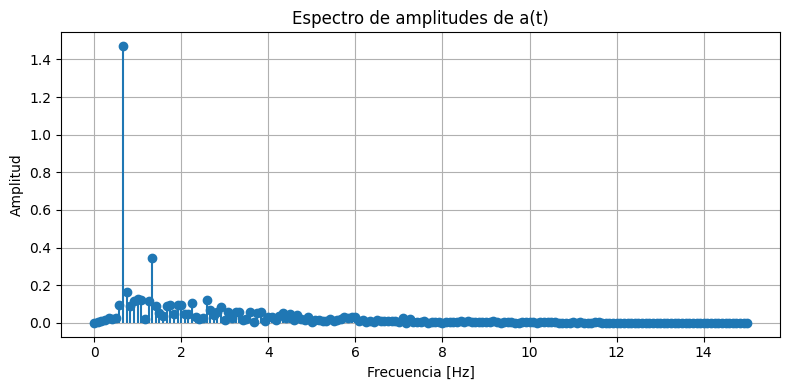

In [12]:
plt.figure(figsize=(8, 4))
plt.stem(freqs, mag, basefmt=" ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("Espectro de amplitudes de a(t)")
plt.grid(True)
plt.tight_layout()
plt.show()
